## Lotka-Volterra Simulation

### 1. Simulation Code [#algorithms, #simulation, #variables, #dataviz]

Write code that inputs the initial ($t=0$) populations for predator and prey, parameter values, desired final output time, and time-step size ($h$), and outputs graphs of both predator and prey populations at each time-step on the same plot; final predicted population sizes for both predator and prey. 

* Write comments for each function you define, specifying inputs and outputs, along with a brief description of what the function does.
* Consider your initial parameter inputs. Explain how the result changes as you vary the initial parameters. Can you find a set of initial parameters that produce stable cyclic population dynamics? Explain the significance of this.

The initial population of rabits is: 50.0 rabbits
The initial population of wold is:   5.0 wolfs


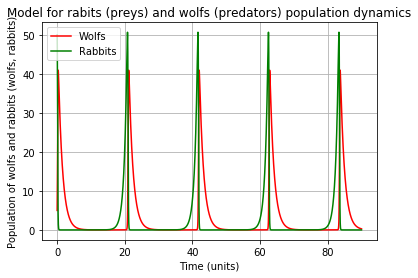

The final population of rabits is: 0 rabbits
The final population of wold is: 0 wolfs


In [18]:
import matplotlib.pyplot as plt #this will be used to create a plot
import numpy as np #library that allows us store the values in arrays 
#setting initial positive parameters 
#these are parameters that describe interactions between predator and prey 
a = 1.2 #reproduction rate of the preys (or rabbits)
b = 0.4 #rate at which predator meets prey, also can be considered as a death rate of preys (or rabbits)
d = 0.3 #reproduction rate fo wolfs
g = 0.8 #natural death rate of wolfs
h = 0.000004 #step size, tahat is how far to the right we will go on the graph along the tangent line of the 
#previous point
time_interval = np.arange(0, 90, h) #we create an array of time and it will be in range 0-90, the 'tick' time 
#would be 'tick' with the interval of h, which is step size for numerical solutions approximation; 

wolf = np.empty_like(time_interval) #we create an array which will have the same length as our time data. 
#it is empty now (like the empty egg box) but later it will be filled up with values 
rabbit = np.empty_like(time_interval)
wolf[0] = 5 #we updating the first values of our numpy array with the initial populations' sizes. Whether it 5 or
#5000000 does not matter much for representing _general_ fluctations of the population. This is usually a goal of 
#such simulations -> see overall trend of the interactions between certain speicies and whether it will cause 
#any ecological consequences
rabbit[0] = 50
#printing our initial values
print('The initial population of rabits is:', rabbit[0], 'rabbits')
print('The initial population of wold is:  ', wolf[0], 'wolfs')

for i in range(1, len(time_interval)): #we will iterate with the help of loop over the values of created np array 
    #How many times? The number of iterations is equal to the number of time ticks we have. 
    #That is we want to know what were specific population sizes at
    #that certain time tick
    wolf[i] = wolf[i-1] + h * (d * wolf[i-1] * rabbit[i-1] - g * wolf[i-1])
    rabbit[i] = rabbit[i-1] + h * (a * rabbit[i-1] - b * wolf[i-1] * rabbit[i-1])
    #we are saying: take that empty value from theat created array and now we will update it with a new value.
    #what is a new value? this value is derived from the tangent line of a previous point, thus we have [i-1] as 
    #index on the right side of eqaution. These are Lotka-Volterra equations and we set the posiotive parametrs 
    #beforehand 
      
#creating a graph using plt 
        
plt.title("Model for rabits (preys) and wolfs (predators) population dynamics") #seeting up the title
plt.plot(time_interval, wolf, color = 'red', label = 'Wolfs') #so, plot on x axis values of np.array of time and 
#on the y axis values from np.array of wolfs. 
plt.plot(time_interval, rabbit, color = 'green', label = 'Rabbits')# same
plt.xlabel('Time (time units)') #and label the axes
plt.ylabel('Population of wolfs and rabbits (wolfs, rabbits)')
plt.grid() 
plt.legend(loc='upper left')
plt.show()
print('The final population of rabits is:', int(rabbit[-1]), 'rabbits')
print('The final population of wold is:', int(wolf[-1]), 'wolfs')


### 2. Simulation Analysis [#simulation, #modeling]: 

Write a 500-word paper analyzing this simulation and comparing/contrasting it with the NetLogo Wolf Sheep Predation model from class. Address the following points in your write-up:

a) Are there any differences between the assumptions of the Lotka-Volterra model and the assumptions of your simulation? For example, consider whether the model and simulation are continuous or discrete.

b) How does your simulation contrast with an analytical approach to deriving the implications of the Lotka-Volterra model?

c) Compare and contrast your simulation with the NetLogo Wolf Sheep Predation simulation.

* Is each simulation stochastic or deterministic?
* Do they have differing assumptions?
* Do they give differing results?
* Which of them seems to be a more realistic representation of nature? Why?


##### **ANSWER**

**Differences between assumptions for my model and original Lotka-Volterra**
<br/>
<br/>
The assumptions for both models are: 
1. Ther is always enough food for preys;
2. Predator eats only preys, thus preys is the only source of energy/life for them;
3. Population change rate is proportional to the size of the population;
4. Predators eat endlessly; 
5. No noise exists. That it 'ceteris paribus' all the other variables are const, which is hardly possible in the real life. (The environment is homogeneous and static). 

The difference is that the LV is the continuous model which would give as a solution continuous function. Whereas this graph presents discrete point derived form the formula.
<br/>
<br/>
**Analytical VS. Numerical approach: difference**
<br/>
<br/>
As opposed to original LV Model (which is analytical), this model provides discrete time-specific numerical approximations of the solutions. The numerical solution is considered to be my lists for both agents' populations at specific times. That is an _approximate_ set of the point which lies along the continuous analytical solution function.  Whereas otiginal LV model results in analytical folution, which is represented as a function and thus is continuous. 
<br/>
<br/>
**NetLogo VS. My model**
<br/>
<br/>
The model is deterministic as it does not have any random values as input. That is, one should expect the same output as he will run the model over and over again. Whereas the NetLogo model is stochastic as the directions the agents move are random.  
<br/>
Important to note that my model displays cyclical fluctuations between agents by specifying _relationsips_ between them. That is, one can see the picture of the _aggregate, whole_ level, and is unable to infer any conclusions about individualist's behavior. As opposed to the NetLogo model which specifies concrete (simple) rules for _each agent_ (therefore, it is considered to be ABM). This simplicity because of underlying mechanisms for the behavior of agents and their interactions between the agents results in an overall complex picture. Thus the model let one infer conclusions about the phenomenon at two different levels: _individualistic and aggregate_, which offers more feedback to the creator. 
<br/>
<br/>
_Assumptions and resulting differences_
<br/>
The main difference lies in the nature of the environment. For example, introduction of the grass in NL limits the growth of population. Also, the random movements of the animals result in more unstable and less predictable model.
<br/>
<br/>
_Reality of the models_
As for me, the NetLogo is more realistic as it also provides us with the environmental variable, such as grass (which constraint the growth of the animals' population. Also, it includes some randomness in itself as animals move and meet randomly, as it often happens in nature. What is more, it shows the individual behavior of specific agents and thus gives us an opportunity to add more agents if needed for better reality replication, whereas LV has already specified parameters for specifically these two animals interaction. 

